### Deep Learning in the Eye Tracking World 
#### the tutorial presented during ETRA 2021 (https://etra.acm.org/2021/acceptedtutorials.html)
#### the code downloaded from: https://github.com/kasprowski/etra2021
@author: pawel@kasprowski.pl


# Classification of the EMVIC dataset
The example presents the simplest usage of the Keras/Tensorflow package to create and use a neural network.
It also uses some methods from sklearn package.

## Import packages

In [1]:
import pandas as pd
import sklearn
import numpy as np
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import matplotlib.pyplot as plt

## Download the dataset

In [2]:
import requests
r = requests.get("https://raw.githubusercontent.com/kasprowski/etra2021/main/emvic/emvic.data", allow_redirects=True)
open('emvic.data', 'wb').write(r.content)
print("Downloaded to emvic.data")

Downloaded to emvic.data


## Load data and extract samples and labels

In [3]:
trainData = pd.read_csv('emvic.data',sep='\t',header=None)
# columns from 4097 to the end contain features (see http://www.kasprowski.pl/emvic2012 for details)
samples = np.array(trainData.values[:,4097:],dtype=float)
# class is in the first column
labels = trainData.values[:,0]
print("Labels distribution:",Counter(labels))
print("Samples shape",samples.shape)
print("Labels shape",labels.shape)

Labels distribution: Counter({'a25': 105, 'a37': 63, 'a40': 52, 'a32': 50, 'a41': 39, 'a42': 38, 'a29': 36, 'a28': 33})
Samples shape (416, 8192)
Labels shape (416,)


## Convert labels to one-hot

In [4]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
classesNum = labels.shape[1]
print("Number of classes:",classesNum)
print("Labels shape:",labels.shape)

Number of classes: 8
Labels shape: (416, 8)


## Create the model

In [5]:
model = Sequential()
model.add(Dense(150, input_dim=samples.shape[1], activation='sigmoid'))
model.add(Dense(150, activation='sigmoid'))
model.add(Dense(150, activation='sigmoid'))
model.add(Dense(150, activation='sigmoid'))
model.add(Dense(classesNum, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               1228950   
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 1208      
Total params: 1,298,108
Trainable params: 1,298,108
Non-trainable params: 0
_________________________________________________________________


## Divide into training and test sets

In [6]:
# train-test split
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples, labels, random_state=30
    , stratify=labels
    )

## Train the model

In [7]:
H = model.fit(trainSamples, trainLabels,epochs=100,validation_data=(testSamples,testLabels))    

Epoch 1/100
10/10 [==============================] - 0s 22ms/step - loss: 2.1116 - accuracy: 0.2083 - val_loss: 2.0105 - val_accuracy: 0.2500
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 2.0348 - accuracy: 0.2660 - val_loss: 2.0012 - val_accuracy: 0.2500
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 2.0061 - accuracy: 0.2532 - val_loss: 1.9932 - val_accuracy: 0.2500
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 1.9937 - accuracy: 0.2532 - val_loss: 1.9764 - val_accuracy: 0.2500
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 1.9798 - accuracy: 0.2532 - val_loss: 1.9563 - val_accuracy: 0.2500
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 1.9652 - accuracy: 0.2532 - val_loss: 1.9318 - val_accuracy: 0.2500
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 1.9313 - accuracy: 0.2532 - val_loss: 1.8870 - val_accuracy: 0.2500
Epoch 8

## Check training history 

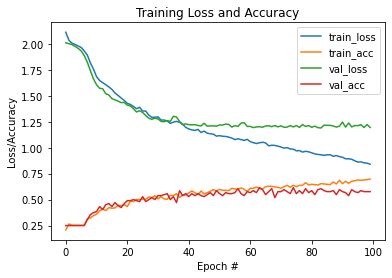

In [8]:
N = np.arange(0, 100)

plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


## Check error for the training set

In [9]:
trainResults = model.predict(trainSamples)

print(confusion_matrix(trainLabels.argmax(axis=1), trainResults.argmax(axis=1)))
print(classification_report(trainLabels.argmax(axis=1), trainResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(trainLabels.argmax(axis=1), trainResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(trainLabels.argmax(axis=1), trainResults.argmax(axis=1)))


[[77  0  0  2  0  0  0  0]
 [ 0 13  3  0  6  0  2  1]
 [ 0  1 26  0  0  0  0  0]
 [ 2  0  3 19  6  1  1  5]
 [ 0  2  4  5 32  0  4  0]
 [ 2  2  0  0  0 35  0  0]
 [ 3  3  2  3  7  0 11  0]
 [ 1  0  3  4  9  0  1 11]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        79
           1       0.62      0.52      0.57        25
           2       0.63      0.96      0.76        27
           3       0.58      0.51      0.54        37
           4       0.53      0.68      0.60        47
           5       0.97      0.90      0.93        39
           6       0.58      0.38      0.46        29
           7       0.65      0.38      0.48        29

    accuracy                           0.72       312
   macro avg       0.68      0.66      0.66       312
weighted avg       0.72      0.72      0.71       312

Cohen's Kappa: 0.6672322683860958
Accuracy:  0.717948717948718


## Check error for the test set

In [10]:
testResults = model.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1)))


[[24  0  0  1  0  1  0  0]
 [ 0  4  1  0  3  0  0  0]
 [ 0  1  6  0  1  0  1  0]
 [ 1  0  0  6  5  1  0  0]
 [ 1  0  2  1  8  2  2  0]
 [ 1  0  0  1  1 10  0  0]
 [ 1  3  0  1  3  0  1  1]
 [ 1  0  0  4  2  0  1  1]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        26
           1       0.50      0.50      0.50         8
           2       0.67      0.67      0.67         9
           3       0.43      0.46      0.44        13
           4       0.35      0.50      0.41        16
           5       0.71      0.77      0.74        13
           6       0.20      0.10      0.13        10
           7       0.50      0.11      0.18         9

    accuracy                           0.58       104
   macro avg       0.52      0.50      0.49       104
weighted avg       0.56      0.58      0.55       104

Cohen's Kappa: 0.4980805089393441
Accuracy:  0.5769230769230769


## Using Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(trainSamples, trainLabels)

treeResults = treemodel.predict(testSamples)    

print(confusion_matrix(testLabels.argmax(axis=1), treeResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), treeResults.argmax(axis=1)))
treeAcc = accuracy_score(testLabels.argmax(axis=1), treeResults.argmax(axis=1)) 
print("Tree Accuracy: {:.2f}".format(treeAcc))

[[24  0  0  0  1  1  0  0]
 [ 2  3  0  0  0  1  2  0]
 [ 2  1  4  1  1  0  0  0]
 [ 3  0  0  8  0  0  0  2]
 [ 1  2  1  4  5  0  0  3]
 [ 2  1  1  1  3  5  0  0]
 [ 1  0  1  1  0  0  5  2]
 [ 0  2  0  1  1  1  1  3]]
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        26
           1       0.33      0.38      0.35         8
           2       0.57      0.44      0.50         9
           3       0.50      0.62      0.55        13
           4       0.45      0.31      0.37        16
           5       0.62      0.38      0.48        13
           6       0.62      0.50      0.56        10
           7       0.30      0.33      0.32         9

    accuracy                           0.55       104
   macro avg       0.51      0.49      0.49       104
weighted avg       0.54      0.55      0.53       104

Tree Accuracy: 0.55
